# Sentiment Analysis:
This is a sentiment analysis on social media for 100 tweets on news medial selected:
BBC,CNN,CBS,FoxNew and New York Times.The data collected were analyzed below:

In [1]:
!pip install vaderSentiment
# Import and Initialize Sentiment Analyzer

You are using pip version 18.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Import the needed packages

In [2]:
import tweepy,json,time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

## Getting the Twitter API Keys

In [3]:
twitter_access_token = "966112597975150592-I6l9SD8IOj3OYmQBkOnNeRLr3lyqsrN"
twitter_access_token_secret = "HR3Eiyfh3kG16zTraLdXCtcNLMhXOdU23UH8cYfNkzRBV"
twitter_consumer_key = "rjQVbO0NyrvcuJDT91752ex11"
twitter_consumer_secret = "zufLHHrPOWN1sF8JocuB36wj4yZWscIwUGwQYkh8TYfCG9aRIG"

## Let us then configure theTweepy API Authentication

In [4]:
auth = tweepy.OAuthHandler(twitter_consumer_key, twitter_consumer_secret)
auth.set_access_token(twitter_access_token, twitter_access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Let us now specify the data sources

In [5]:
news_sources = ("@BBC", "@ctvnews", "@CNN","@FoxNews", "@dawn_com")

In [6]:
# We start extracting 100 tweets from each of the news sources
print("...STARTING..... collecting tweets from sources")

# Let us define an array to hold the sentiments
array_sentiments = []

for user in news_sources:
    count_tweet=100  # Setting the twitter count at 100
    print("Start tweets from %s"%user)
    for x in range(5):     # Extracting 5 pages of tweets
        public_tweets=api.user_timeline(user,page=x)
        # For each tweet 
        for tweet in public_tweets:
            #Calculating the compound,+ive,-ive and neutral value for each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
         
            array_sentiments.append({"Media":user,
                                    "Tweet Text":tweet["text"],
                                    "Compound":compound,
                                    "Positive":pos,
                                    "Negative":neg,
                                    "Neutral":neu,
                                    "Date":tweet["created_at"],
                                    "Tweets Ago":count_tweet})
            
            count_tweet-=1

print("DONE with extracting tweets")

...STARTING..... collecting tweets from sources
Start tweets from @BBC
Start tweets from @ctvnews
Start tweets from @CNN
Start tweets from @FoxNews
Start tweets from @dawn_com
DONE with extracting tweets


## Process the data and store it.

In [7]:
# Creating a dataframe from the Sentiment Array Converting the sentiment arrary to a dataframe
sentiments_df=pd.DataFrame.from_dict(array_sentiments)
# Removing the '@' from Media column in the data frame
sentiments_df['Media'] = sentiments_df['Media'].map(lambda x: x.lstrip('@'))

# Re_arranging the order of columns before saving into CSV file
sentiments_df=sentiments_df[["Media","Date","Tweet Text","Compound","Positive","Negative","Neutral","Tweets Ago"]]
# Storing into a CSV File\
sentiments_df.to_csv("mySentimentAnalysis.csv")

sentiments_df.head(10)




,Media,Date,Tweet Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,BBC,Wed Jun 03 18:01:00 +0000 2020,I've found your new lockdown activity. 🥢\n\n#Q...,0.0000,0.000,0.000,1.000,100
1,BBC,Wed Jun 03 16:01:00 +0000 2020,The NHS has introduced a test and trace system...,0.2144,0.074,0.000,0.926,99
2,BBC,Wed Jun 03 13:01:00 +0000 2020,"""I hope this is a learning point for many peop...",0.4404,0.182,0.000,0.818,98
3,BBC,Wed Jun 03 12:01:00 +0000 2020,These monkeys are treated like gods! 🙉\n\n#Pri...,0.4199,0.166,0.000,0.834,97
4,BBC,Wed Jun 03 11:01:00 +0000 2020,"This is the fascinating story of David Mayan, ...",0.8074,0.372,0.000,0.628,96
5,BBC,Wed Jun 03 09:19:24 +0000 2020,RT @bbcpress: Watch out for Rachel Carey - @BB...,0.1027,0.065,0.000,0.935,95
6,BBC,Wed Jun 03 08:01:00 +0000 2020,Ophelia channels the otherworldly art of her i...,0.0000,0.000,0.000,1.000,94
7,BBC,Wed Jun 03 06:53:10 +0000 2020,RT @bbcpress: BBC Young Jazz Musician returns ...,0.8658,0.350,0.000,0.650,93
8,BBC,Tue Jun 02 14:55:56 +0000 2020,RT @BBCR1: “You cannot enjoy the rhythm and ig...,-0.7127,0.096,0.281,0.623,92
9,BBC,Tue Jun 02 13:16:18 +0000 2020,"RT @BBCR1: ""This is your problem too. It's min...",-0.8934,0.000,0.360,0.640,91


In [8]:
# Creating an array with the unique Media sources in the data frame
source=sentiments_df["Media"].unique()

## Visualization for media sources

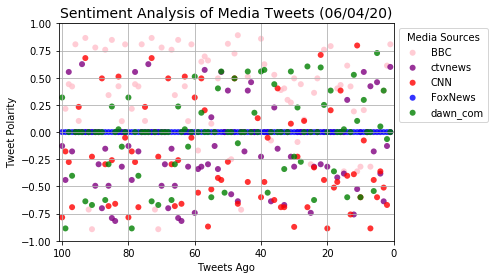

In [9]:
for media in source:
    mydf=sentiments_df[sentiments_df["Media"]==media]
    plt.scatter(mydf["Tweets Ago"],mydf["Compound"], marker="o", linewidth=0, alpha=0.8, label=media,
                facecolors=mydf.Media.map({"BBC": "pink", "ctvnews" : "purple",  "CNN": 'red',
                                              "FoxNews":"blue","dawn_com":"green"}))

plt.legend(bbox_to_anchor = (1,1),title="Media Sources")
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")), fontsize=14)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(101,0)
plt.ylim(-1,1)
plt.grid(True)
plt.savefig("Output/Sentiment Analysis of Media Tweets.png",bbox_inches='tight')
plt.show()

## Calculating the summary statistics

In [10]:
# Calculating the mean for each Media channel and storing to a dataframe
means_media_trends=sentiments_df.groupby("Media").mean()["Compound"].to_frame()
#Resetting the index 
means_media_trends.reset_index(inplace=True)

means_media_trends


,Media,Compound
0,BBC,0.240195
1,CNN,-0.174892
2,FoxNews,0.000000
3,ctvnews,-0.130889
4,dawn_com,-0.024180
